In [1]:
import pennylane as qml
from pennylane import numpy as np

In [2]:
property_prices = [4, 8, 6, 3, 12, 15] #48  total

variables_wires = [0, 1, 2, 3, 4, 5]
aux_oracle_wires = [6, 7, 8, 9, 10, 11]

In [3]:
def oracle(variables_wires, aux_oracle_wires):
    
    def add_k_fourier(k, wires):
        for j in range(len(wires)):
            qml.RZ(k*np.pi/(2**j), wires = wires[j])
            
    def value_second_sibling():
        
        qml.QFT(wires = aux_oracle_wires)
        
        for wire in variables_wires:
            qml.ctrl(add_k_fourier, control = wire)(property_prices[wire], wires = aux_oracle_wires)
            
        qml.adjoint(qml.QFT)(wires = aux_oracle_wires)
        
    value_second_sibling()
    qml.FlipSign(sum(property_prices)//2, wires = aux_oracle_wires)
    qml.adjoint(value_second_sibling)()
            

In [4]:
dev = qml.device("default.qubit", wires = variables_wires + aux_oracle_wires)

@qml.qnode(dev)
def circuit():
    
    #step 1
    
    for wire in variables_wires:
        qml.Hadamard(wires = wire)
   

    for _ in range(3):
        #step 2
    
        oracle(variables_wires, aux_oracle_wires)
    
        #step 3
    
        qml.GroverOperator(wires = variables_wires)
    
    return qml.probs(wires = variables_wires)

In [5]:
import matplotlib.pyplot as plt

<BarContainer object of 64 artists>

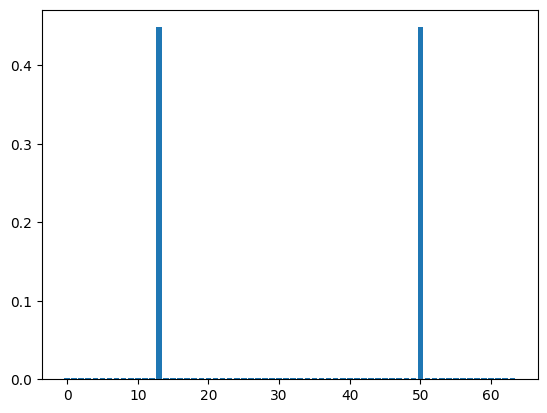

In [6]:
values = circuit()
plt.bar(range(len(values)), values)

In [7]:
dev = qml.device("default.qubit", wires = variables_wires + aux_oracle_wires, shots = 1)

@qml.qnode(dev)
def circuit():
    
    #step 1
    
    for wire in variables_wires:
        qml.Hadamard(wires = wire)
   

    for _ in range(3):
        #step 2
    
        oracle(variables_wires, aux_oracle_wires)
    
        #step 3
    
        qml.GroverOperator(wires = variables_wires)
    
    return qml.sample(wires = variables_wires)

In [8]:
values = circuit()
print(values)

[0 0 1 0 0 0]
